## Klasse für Berechnung von K nearest neighbour


In [7]:
import numpy as np
from collections import Counter


# Berechnung des euklidischen Abstandes der Punkte im n-dimensionalen Raum:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

class KNN:
    # K = wvl. Nachbarpkte sollen in das Abstandsranking mit einbezogen werden, wird beim Klassenaufruf übergeben
    def __init__(self, k):
        self.k = k

    # Werte x (features) und y (targest/Klassenzuordung) werden übergeben
    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    # Gibt Liste mit Vorhersage der Klassen aller Elemente des Feature-Array zurück
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    # Vorhersage der Klasse eines Bildes x:
    def _predict(self, x):
        # Abstände berechnen: Ausgabe des Arrays für Abstände des Featurepunktes zu allen anderen Punkten der Trainigsdaten
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Die Indizes der nahsten k Nachbarn des Punkes aus Liste extrahieren
        k_indices = np.argsort(distances)[: self.k]
        # Über Indizes auf Klassen der nahsten k Nachbarn zugreifen und diese in Liste schreiben
        # k_nearest_labels = [self.Y_train[i] for i in k_indices] # funktioniert nicht weil folgende Funktion "Counter" nur "hashbare" Eingaben verarbeiten kann. das "numpy.ndarray" wird deshalb erst in ein tuple gewandelt
        k_nearest_labels = [tuple(self.Y_train[i]) for i in k_indices]

        # Gibt Liste von Tuples zurück. Diese enthalten jeweils die Zahl für eine Klasse und die Anzahl wie oft sie vorgekommen ist.
        # Die Tuples sind in abst. Häufigkeit nach Vorkommen der Klassen sortiert
        most_common = Counter(k_nearest_labels).most_common()
        # Tuple: [Klasse][Häufigkeit des Vorkommens in k nächsten Nachbarn]
        return most_common[0][0]

## Trainieren und Testen


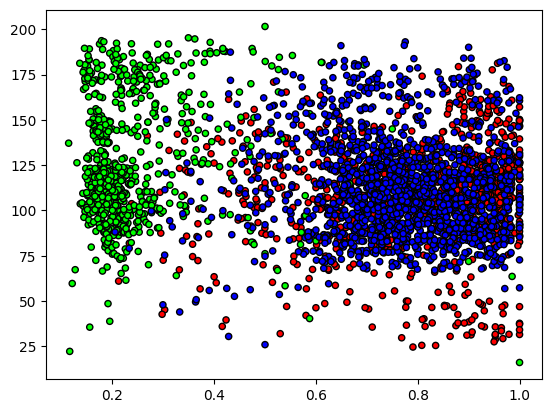

[(2,), (1,), (2,), (1,), (2,), (2,), (0,), (0,), (0,), (1,), (0,), (1,), (2,), (1,), (1,), (2,), (2,), (1,), (0,), (1,), (2,), (0,), (2,), (2,), (2,), (1,), (0,), (2,), (1,), (2,), (2,), (1,), (2,), (1,), (1,), (0,), (2,), (2,), (1,), (0,), (1,), (0,), (0,), (2,), (2,), (2,), (2,), (0,), (0,), (0,), (2,), (2,), (2,), (1,), (2,), (2,), (1,), (2,), (0,), (2,), (1,), (2,), (2,), (2,), (0,), (1,), (2,), (2,), (2,), (0,), (2,), (2,), (2,), (1,), (2,), (0,), (2,), (1,), (2,), (2,), (0,), (0,), (0,), (2,), (0,), (2,), (2,), (0,), (2,), (1,), (2,), (2,), (2,), (1,), (0,), (2,), (0,), (2,), (2,), (2,), (2,), (2,), (2,), (1,), (2,), (0,), (2,), (2,), (2,), (1,), (2,), (2,), (0,), (1,), (0,), (0,), (1,), (1,), (2,), (2,), (2,), (0,), (0,), (2,), (2,), (2,), (1,), (2,), (0,), (2,), (2,), (2,), (2,), (2,), (2,), (0,), (2,), (2,), (1,), (1,), (1,), (2,), (1,), (2,), (1,), (1,), (2,), (2,), (0,), (0,), (0,), (2,), (1,), (0,), (0,), (1,), (2,), (2,), (2,), (1,), (2,), (0,), (2,), (0,), (1,), (0,), (1,

In [8]:
import pandas as pd

# datasets aus sklearn importieren
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

data = pd.read_csv("output.csv", index_col=0)
data_burghart = pd.read_csv("output_burghart.csv", index_col=0)

X = data.iloc[
    :, :-1
].values  # erstes ":" für alle Zeilen, nach dem Komma ":-1" = "alle Spalten bis auf die letzte", Bildung np-Array durch ".values"
Y = data.iloc[:, -1].values.reshape(-1, 1)

X_burghart_test = data.iloc[
    :, :-1
].values
Y_burghart_test = data.iloc[:, -1].values.reshape(-1, 1)

# Aufteilen in tainings- und testdaten
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1234
)
# Scatterplot erstellen, mit features "aspect ratio" (x-Achse) und "Red" (y-Achse), Klassenzuordnung mit c=Y übergeben
plt.figure()
plt.scatter(X[:, 1], X[:, 5], c=Y, cmap=cmap, edgecolor="k", s=20)
plt.show()

classifier = KNN(k=5)  # KNN mit k = 5 initialiserien
classifier.fit(X_train, Y_train)  # Trainingsdaten übergeben
predictions = classifier.predict(X_test)  # Vorhersagen für Testdaten treffen
Y_burghart_pred = classifier.predict(X_burghart_test)

print(predictions)
# acc = Anzahl vorhergesagte Klassen die der echten Klasse entsprechen / Gesamtanzahl
acc = np.sum(predictions == Y_test) / len(Y_test)
acc_burghart = np.sum(Y_burghart_pred == Y_burghart_test) / len(Y_burghart_test)

print("accuracy score:", acc)
print("accuracy score burghart:", acc_burghart)